# Analyzing Used Car Listings on eBay Kleinanzeigen
In this project, we'll work with a dataset of used cars from eBay Kleinanzeigen, a [classifieds](https://en.wikipedia.org/wiki/Classified_advertising) section of the German eBay website.

The dataset was originally scraped and uploaded to [Kaggle](https://www.kaggle.com/orgesleka/used-cars-database/data). 

We sampled 50,000 data points from the full dataset, to ensure code runs quickly

The data dictionary provided with data is as follows:

* `dateCrawled` - When this ad was first crawled. All field-values are taken from this date.
* `name` - Name of the car.
* `seller` - Whether the seller is private or a dealer.
* `offerType` - The type of listing
* `price` - The price on the ad to sell the car.
* `abtest` - Whether the listing is included in an A/B test.
* `vehicleType` - The vehicle Type.
* `yearOfRegistration` - The year in which the car was first registered.
* `gearbox` - The transmission type.
* `powerPS` - The power of the car in PS.
* `model` - The car model name.
* `kilometer` - How many kilometers the car has driven.
* `monthOfRegistration` - The month in which the car was first registered.
* `fuelType` - What type of fuel the car uses.
* `brand` - The brand of the car.
* `notRepairedDamage` - If the car has a damage which is not yet repaired.
* `dateCreated` - The date on which the eBay listing was created.
* `nrOfPictures` - The number of pictures in the ad.
* `postalCode` - The postal code for the location of the vehicle.
* `lastSeenOnline` - When the crawler saw this ad last online.

The aim of this project is to clean the data and analyze the included used car listings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

autos = pd.read_csv("autos.csv", encoding = "latin-1")
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [2]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

The dataset contains 20 columns, most of which are strings.Some columns have null values, but none have more than ~20% null values.

In [3]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

Convert the column names from camelcase to snakecase and reword some of the column names based on the data dictionary to be more descriptive.

In [4]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen']

In [5]:
autos.head(2)

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08


# Initial Data Exploration and Cleaning


In [6]:
autos.describe(include = "all") # with include='all' to get both categorical and numeric columns

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-21 16:37:21,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


* There are a number of text columns where all (or nearly all) of the values are the same:
  * `seller`
  * `offer_type`
* The `num_photos` column looks odd, we'll need to investigate this further.

In [7]:
autos["num_photos"].value_counts(dropna = False)

0    50000
Name: num_photos, dtype: int64

it seems like `num_photos` has `0's` at all rows. we will drop this column

In [8]:
autos.drop(["num_photos","seller","offer_type"], axis = 1, inplace = True)
# autos = autos.drop(["num_photos", "seller", "offer_type"], axis=1) # alternate method
autos.head(2)

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08


There are two columns, `price` and `odometer`, which are numeric values with extra characters being stored as text. We'll clean and convert these.

In [9]:
autos.price = autos.price.str.replace("$","").str.replace(",","").astype(int)

In [10]:
autos["price"].head(3)

0    5000
1    8500
2    8990
Name: price, dtype: int32

In [11]:
autos["odometer"] = autos["odometer"].str.replace(",","").str.replace("km","").astype(int)
autos["odometer"].head(3)

0    150000
1    150000
2     70000
Name: odometer, dtype: int32

In [12]:
autos = autos.rename({"odometer":"odometer_km"}, axis = 1)
# autos.rename({"odometer":"odometer_km"}, axis = 1, inplace = True) # Alternative method
autos.columns

Index(['date_crawled', 'name', 'price', 'ab_test', 'vehicle_type',
       'registration_year', 'gearbox', 'power_ps', 'model', 'odometer_km',
       'registration_month', 'fuel_type', 'brand', 'unrepaired_damage',
       'ad_created', 'postal_code', 'last_seen'],
      dtype='object')

# Exploring Odometer and Price

In [13]:
autos["odometer_km"].value_counts()

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: odometer_km, dtype: int64

In [14]:
print(autos["price"].unique().shape)
print(autos["price"].describe())
print(autos["price"].value_counts().sort_index().head(20))

(2357,)
count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64
0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
20       4
25       5
29       1
30       7
35       1
Name: price, dtype: int64


There are 1,421 cars listed with $0 price - given that this is only 2% of the of the cars, we might consider removing these rows. The maximum price is one hundred million dollars, which seems a lot, let's look at the highest prices further.

In [15]:
autos["price"].value_counts().sort_index(ascending = False).head(10)

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
Name: price, dtype: int64

There are a number of listings with prices below 30 dollars, including about 1,500 at dollar 0. There are also a small number of listings with very high values, including 14 at around or over $1 million.

Given that eBay is an auction site, there could legitimately be items where the opening bid is dollar 1. We will keep the dollar 1 items, but remove anything above dollar 350,000, since it seems that prices increase steadily to that number and then jump up to less realistic numbers.

In [16]:
# autos = autos[(autos["price"]>=1) & (autos["price"]<351000)]
autos = autos[autos["price"].between(1,351000)]
autos["price"].describe()


count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64

# Exploring date columns

There are 5 columns that should represent date values. Some of these columns were created by the crawler, some came from the website itself. We can differentiate by referring to the data dictionary:

- `date_crawled`: added by the crawler
- `last_seen`: added by the crawler
- `ad_created`: from the website
- `registration_month`: from the website
- `registration_year`: from the website

The `date_crawled`, `last_seen`, and `ad_created` columns are all identified as string values by pandas. Because these three columns are represented as strings, we need to convert the data into a numerical representation so we can understand it quantitatively. The other two columns are represented as numeric values

In [17]:
autos[["date_crawled","last_seen","ad_created"]].head()

,date_crawled,last_seen,ad_created
0,2016-03-26 17:47:46,2016-04-06 06:45:54,2016-03-26 00:00:00
1,2016-04-04 13:38:56,2016-04-06 14:45:08,2016-04-04 00:00:00
2,2016-03-26 18:57:24,2016-04-06 20:15:37,2016-03-26 00:00:00
3,2016-03-12 16:58:10,2016-03-15 03:16:28,2016-03-12 00:00:00
4,2016-04-01 14:38:50,2016-04-01 14:38:50,2016-04-01 00:00:00


In [18]:
autos["date_crawled"].str[:10].value_counts(normalize = True, dropna = False).sort_index()

2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-10    0.032184
2016-03-11    0.032575
2016-03-12    0.036920
2016-03-13    0.015670
2016-03-14    0.036549
2016-03-15    0.034284
2016-03-16    0.029610
2016-03-17    0.031628
2016-03-18    0.012911
2016-03-19    0.034778
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-22    0.032987
2016-03-23    0.032225
2016-03-24    0.029342
2016-03-25    0.031607
2016-03-26    0.032204
2016-03-27    0.031092
2016-03-28    0.034860
2016-03-29    0.034099
2016-03-30    0.033687
2016-03-31    0.031834
2016-04-01    0.033687
2016-04-02    0.035478
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: date_crawled, dtype: float64

Looks like the site was crawled daily over roughly a one month period in March and April 2016. The distribution of listings crawled on each day is roughly uniform.

In [19]:
autos["last_seen"].str[:10].value_counts(normalize = True, dropna = False).sort_index()

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-12    0.023783
2016-03-13    0.008895
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-17    0.028086
2016-03-18    0.007351
2016-03-19    0.015834
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-22    0.021373
2016-03-23    0.018532
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-26    0.016802
2016-03-27    0.015649
2016-03-28    0.020859
2016-03-29    0.022341
2016-03-30    0.024771
2016-03-31    0.023783
2016-04-01    0.022794
2016-04-02    0.024915
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: last_seen, dtype: float64

The crawler recorded the date it last saw any listing, which allows us to determine on what day a listing was removed, presumably because the car was sold.

The last three days contain a disproportionate amount of 'last seen' values. Given that these are 6-10x the values from the previous days, it's unlikely that there was a massive spike in sales, and more likely that these values are to do with the crawling period ending and don't indicate car sales.

In [20]:
autos["ad_created"].str[:10].value_counts(normalize = True, dropna = False).sort_index()

2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
                ...   
2016-04-03    0.038855
2016-04-04    0.036858
2016-04-05    0.011819
2016-04-06    0.003253
2016-04-07    0.001256
Name: ad_created, Length: 76, dtype: float64

There is a large variety of ad created dates. Most fall within 1-2 months of the listing date, but a few are quite old, with the oldest at around 9 months.

In [21]:
autos["registration_year"].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

The year that the car was first registered will likely indicate the age of the car. Looking at this column, we note some odd values. The minimum value is 1000, long before cars were invented and the maximum is 9999, many years into the future.

Because a car can't be first registered after the listing was seen, any vehicle with a registration year above 2016 is definitely inaccurate. Determining the earliest valid year is more difficult. Realistically, it could be somewhere in the first few decades of the 1900s.

Let's count the number of listings with cars that fall outside the 1900 - 2016 interval and see if it's safe to remove those rows entirely, or if we need more custom logic.

In [22]:
((~autos["registration_year"].between(1900,2016)).sum())/autos.shape[0]
# (autos.shape[0] - ((autos["registration_year"]>= 1900) & (autos["registration_year"]<= 2016)).sum())/autos.shape[0] # 2nd Method

0.038793369710697

Given that this is less than 4% of our data, we will remove these rows.

In [23]:
autos =autos[autos["registration_year"].between(1900,2016)]

In [24]:
autos["registration_year"].value_counts(normalize = True).head(10)

2000    0.067608
2005    0.062895
1999    0.062060
2004    0.057904
2003    0.057818
2006    0.057197
2001    0.056468
2002    0.053255
1998    0.050620
2007    0.048778
Name: registration_year, dtype: float64

It appears that most of the vehicles were first registered in the past 20 years.

# Exploring Price by Brand

Use aggregation to understand the brand column.

In [25]:
autos["brand"].value_counts(normalize = True).head()

volkswagen       0.211264
bmw              0.110045
opel             0.107581
mercedes_benz    0.096463
audi             0.086566
Name: brand, dtype: float64

German manufacturers represent four out of the top five brands, almost 50% of the overall listings. `Volkswagen` is by far the most popular brand, with approximately double the cars for sale of the next two brands combined.

There are lots of brands that don't have a significant percentage of listings, so we will limit our analysis to brands representing more than 5% of total listings.

In [26]:
brand_counts = autos["brand"].value_counts(normalize = True)
common_brand = brand_counts[brand_counts>0.05].index
common_brand

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')

In [27]:
brand_mean_prices = {}
for b in common_brand:
    brand = autos[autos["brand"] ==b]
    brand_price = brand["price"]
    mean_price = brand_price.mean()
    brand_mean_prices[b] = int(mean_price)

brand_mean_prices   

{'volkswagen': 5402,
 'bmw': 8332,
 'opel': 2975,
 'mercedes_benz': 8628,
 'audi': 9336,
 'ford': 3749}

Of the top 5 brands, there is a distinct price gap:

* `Audi`, `BMW` and `Mercedes Benz` are more expensive
* `Ford` and `Opel` are less expensive
* `Volkswagen` is in between - this may explain its popularity, it may be a 'best of 'both worlds' option.

In [28]:
bmp_series = pd.Series(brand_mean_prices).sort_values(ascending = False)
bmp_series

audi             9336
mercedes_benz    8628
bmw              8332
volkswagen       5402
ford             3749
opel             2975
dtype: int64

In [29]:
brand_mean_mileage = {}
for b in common_brand:
    brand_df = autos[autos["brand"]==b]
    brand_mean_mileages = brand_df["odometer_km"].mean()
    brand_mean_mileage[b] =int( brand_mean_mileages)
brand_mean_mileage    

{'volkswagen': 128707,
 'bmw': 132572,
 'opel': 129310,
 'mercedes_benz': 130788,
 'audi': 129157,
 'ford': 124266}

In [30]:
bmm_series = pd.Series(brand_mean_mileage).sort_values(ascending = False)
bmm_series

bmw              132572
mercedes_benz    130788
opel             129310
audi             129157
volkswagen       128707
ford             124266
dtype: int64

In [31]:
brand_info = pd.DataFrame(bmp_series,columns = ["mean_price"])
brand_info['mean_mileage'] = bmm_series
brand_info

,mean_price,mean_mileage
audi,9336,129157
mercedes_benz,8628,130788
bmw,8332,132572
volkswagen,5402,128707
ford,3749,124266
opel,2975,129310


In [39]:
cols = ["mean_price","mean_mileage"]

normalize_info = brand_info.copy()
for c in cols:
    normalize_info[c] = normalize_info[c]/normalize_info[c].sum()

normalize_info

,mean_price,mean_mileage
audi,0.242986,0.166697
mercedes_benz,0.224559,0.168802
bmw,0.216855,0.171105
volkswagen,0.140597,0.166116
ford,0.097574,0.160385
opel,0.077430,0.166895


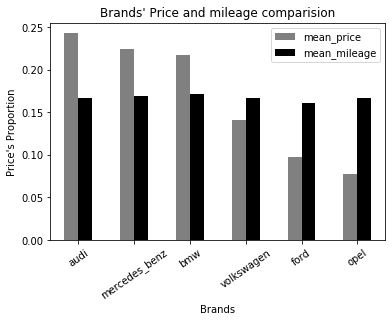

In [54]:
normalize_info.plot.bar(title = "Brands' Price and mileage comparision", rot = 35, 
                        color = ["grey", "k"])
plt.xlabel("Brands")
plt.ylabel("Price's Proportion")
plt.show()

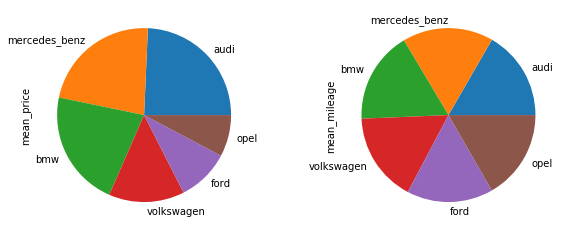

In [141]:
normalize_info.plot.pie(subplots = True, legend = False, figsize = (10,4))
plt.show()

The range of car mileages does not vary as much as the prices do by brand, instead all falling within 10% for the top brands. There is a slight trend to the more expensive vehicles having higher mileage, with the less expensive vehicles having lower mileage.

# Find the most common brand/model combinations

In [87]:
t_brands = ['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford']
top_brands_bol = autos["brand"].isin(t_brands)

top_brands = autos[top_brands_bol]
top_brands.head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,300,test,limousine,1995,manuell,90,golf,150000,8,benzin,volkswagen,NaN,2016-03-20 00:00:00,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,1990,control,limousine,1998,manuell,90,golf,150000,12,diesel,volkswagen,nein,2016-03-16 00:00:00,53474,2016-04-07 03:17:32


In [88]:
top_brands.shape

(31828, 17)

In [89]:
brand_models = top_brands.groupby("brand")["model"].value_counts()
brand_models

brand       model  
audi        a4         1231
            a3          825
            a6          797
            andere      216
            80          198
                       ... 
volkswagen  up           51
            jetta        38
            phaeton      31
            cc           18
            amarok        6
Name: model, Length: 96, dtype: int64

In [98]:
print(brand_models["audi"].index[0])
print(brand_models["audi"][0])

a4
1231


In [191]:
top_brand_models = {}
for brand in t_brands:
    model = brand_models[brand].index[0]
    freq = brand_models[brand][0]
    top_brand_models[brand] = [model, freq]

In [192]:
top_brand_models

{'volkswagen': ['golf', 3707],
 'bmw': ['3er', 2615],
 'opel': ['corsa', 1592],
 'mercedes_benz': ['c_klasse', 1136],
 'audi': ['a4', 1231],
 'ford': ['focus', 762]}

In [193]:
popular_brands_model = pd.DataFrame(top_brand_models, index = ["model", "sold"])
popular_brands_model

,volkswagen,bmw,opel,mercedes_benz,audi,ford
model,golf,3er,corsa,c_klasse,a4,focus
sold,3707,2615,1592,1136,1231,762


In [194]:
popular_brands_model = popular_brands_model.transpose()
# alternate
# popular_brands_model = popular_brands_model.T

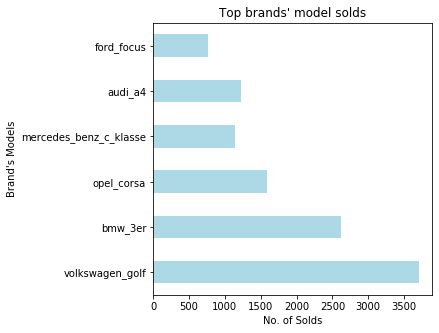

In [195]:
ax = plt.subplot()
popular_brands_model["sold"].plot.barh(figsize = (5,5), color = "lightblue")
x_labels = popular_brands_model.index + "_"+ popular_brands_model["model"].values
ax.set_yticklabels(x_labels)
plt.ylabel("Brand's Models")
plt.xlabel("No. of Solds")
plt.title("Top brands' model solds")
plt.show()

In this project, we practiced applying a variety of pandas methods to explore and understand a data set on car listings. Here are some next steps to consider:

* Data cleaning next steps:
    * Identify categorical data that uses german words, translate them and map the values to their english counterparts
    * Convert the dates to be uniform numeric data, so "2016-03-21" becomes the integer 20160321.
    * See if there are particular keywords in the name column that we can extract as new columns
    
    

* Analysis next steps:
    * Split the `odometer_km` into groups, and use aggregation to see if average prices follows any patterns based on the mileage.
    * How much cheaper are cars with damage than their non-damaged counterparts?